In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Car Price.csv to Car Price.csv


In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# importing CarPrice_Assignment.csv with pandas
# CarData= ...('Car_Price.csv')
# CarData.head()
# Define the data types for each column
dtype = {
    'car_ID': int,
    'symboling': int,
    'CarName': str,
    'fueltype': str,
    'aspiration': str,
    'doornumber': str,
    'carbody': str,
    'drivewheel': str,
    'enginelocation': str,
    'wheelbase': float,
    'carlength': float,
    'carwidth': float,
    'carheight': float,
    'curbweight': int,
    'enginetype': str,
    'cylindernumber': str,
    'enginesize': int,
    'fuelsystem': str,
    'boreratio': float,
    'stroke': float,
    'compressionratio': float,
    'horsepower': int,
    'peakrpm': int,
    'citympg': int,
    'highwaympg': int,
    'price': float
}

# Read the CSV file into a pandas DataFrame
CarData = pd.read_csv("Car Price.csv", dtype=dtype)

CarData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# shape of the dataset
CarData.shape

(205, 26)

In [ ]:
# Display general information about the dataset
# This includes the count of non-null entries per column, the data type of each column, and memory usage.
CarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Generate descriptive statistics for numerical columns
# Provide information like mean, standard deviation, min, max, and quartiles.
desc_stats = CarData.describe()

# Display the descriptive statistics
desc_stats

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:

CarData['CarCompany'] = CarData['CarName'].str.split(' ').str[0]

# Display the new DataFrame
CarData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
# #checking the unique values under "CarCompany"
CarData['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# Create a dictionary to map misspelled names to correct names
correction_dict = {
    'alfa-romero': 'alfa-romeo',
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

# Apply the dictionary to correct misspelled names
CarData['CarCompany'].replace(correction_dict, inplace=True)

# Verify the corrections
CarData['CarCompany'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

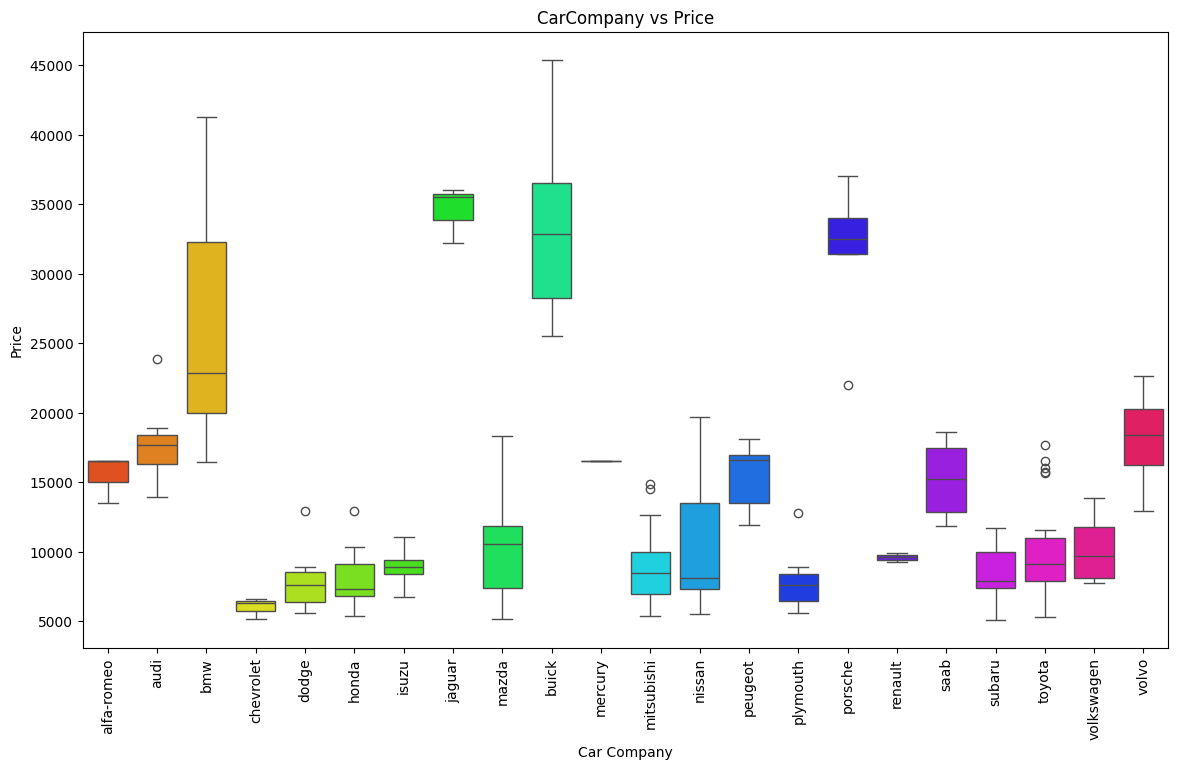

In [ ]:
# Create a color palette with unique colors for each CarCompany
unique_companies = CarData['CarCompany'].unique()
palette = sns.color_palette("hsv", len(unique_companies))
palette_dict = dict(zip(unique_companies, palette))

# Visualising 'CarCompany' variable against dependent variable 'price' via boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='CarCompany', y='price', hue='CarCompany', data=CarData, palette=palette_dict, dodge=False)
plt.xticks(rotation=90)
plt.title('CarCompany vs Price')
plt.xlabel('Car Company')
plt.ylabel('Price')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

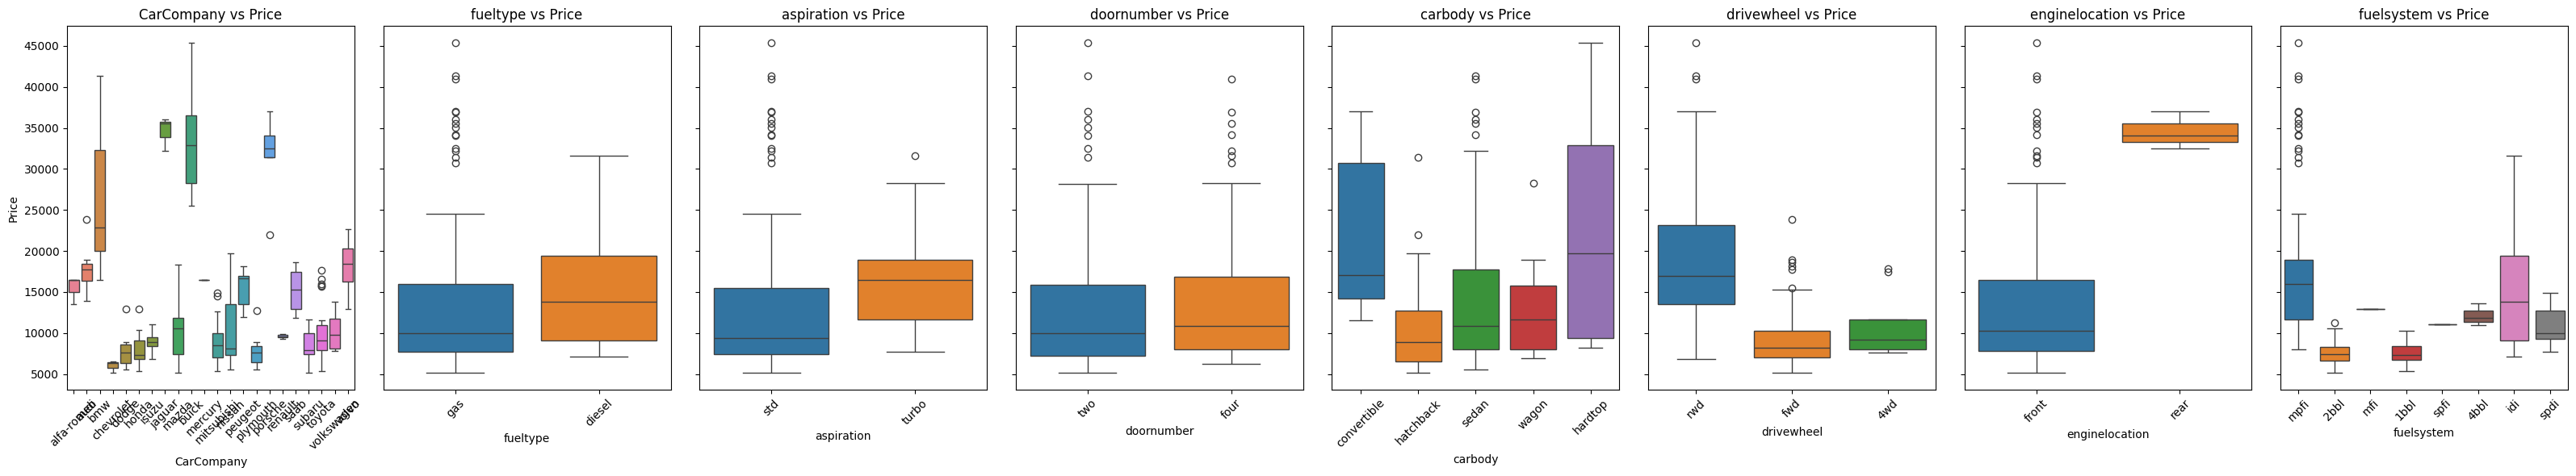

In [ ]:
# Visualising Categorical variables through boxplots
# Create boxplots for each categorical variable against price
# List of categorical variables to create dummy variables
categorical_vars = ['CarCompany', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem']
num_vars = len(categorical_vars)
fig, axes = plt.subplots(1, num_vars, figsize=(4 * num_vars, 6), sharey=True)

for i, var in enumerate(categorical_vars):
    sns.boxplot(x=var, y='price', data=CarData, ax=axes[i], hue=var, dodge=False)
    axes[i].set_title(f'{var} vs Price')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Price')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend([], [], frameon=False)  # Hide the legend

plt.tight_layout()
plt.show()

In [ ]:
#creating a dict 'company price' where key = car's company and value = median of their price
# Creating a dictionary where key = car's company and value = median of their price
company_price = CarData.groupby('CarCompany')['price'].median().to_dict()

# Display the company_price dictionary
print(company_price)

{'alfa-romeo': 16500.0, 'audi': 17710.0, 'bmw': 22835.0, 'buick': 32892.0, 'chevrolet': 6295.0, 'dodge': 7609.0, 'honda': 7295.0, 'isuzu': 8916.5, 'jaguar': 35550.0, 'mazda': 10595.0, 'mercury': 16503.0, 'mitsubishi': 8499.0, 'nissan': 8124.0, 'peugeot': 16630.0, 'plymouth': 7609.0, 'porsche': 32528.0, 'renault': 9595.0, 'saab': 15275.0, 'subaru': 7894.0, 'toyota': 9103.0, 'volkswagen': 9737.5, 'volvo': 18420.0}


In [ ]:
# division in the buckets of low i.e. below 10000, medium i.e. range b/w 10000 and 20000 and high i.e. above 20000
# Categorize the prices into 'low', 'medium', and 'high'
price_bins = [0, 10000, 20000, float('inf')]
price_labels = ['low', 'medium', 'high']
CarData['price_category'] = pd.cut(CarData['price'], bins=price_bins, labels=price_labels)
# Mapping the company_price on the 'CarCompany' column in the dataset
CarData['company_median_price'] = CarData['CarCompany'].map(company_price)
# Display the first few rows to verify the new columns
print(CarData[['CarCompany', 'price', 'price_category', 'company_median_price']].head())
# checking the column's unique values
CarData.CarCompany.unique()

   CarCompany    price price_category  company_median_price
0  alfa-romeo  13495.0         medium               16500.0
1  alfa-romeo  16500.0         medium               16500.0
2  alfa-romeo  16500.0         medium               16500.0
3        audi  13950.0         medium               17710.0
4        audi  17450.0         medium               17710.0


array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
#creating dummy variable for catwegorical variables
CarData = pd.get_dummies(CarData, columns=['CarCompany', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'price_category'], drop_first=True)
# Ensure 'price' is still in the DataFrame after creating dummies
CarData['price'] = CarData['price']
#checking the dataset
CarData.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,price_category_medium,price_category_high
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,dohc,four,...,True,False,False,False,False,False,True,False,True,False
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,dohc,four,...,True,False,False,False,False,False,True,False,True,False
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,ohcv,six,...,True,False,True,False,False,False,True,False,True,False
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,ohc,four,...,False,False,False,True,False,True,False,False,True,False
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,ohc,five,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
# importing required library
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
# Splitting the dataset into training and testing sets
CarData_train, CarData_test = train_test_split(CarData, test_size=0.3, random_state=42)

# Shape of the train and test sets
print(CarData_train.shape)
print(CarData_test.shape)

(143, 54)
(62, 54)


In [ ]:
#importing required function for scaling
# Defining the scaler
scaler = MinMaxScaler()

In [ ]:
# Splitting into features and target
# Selecting only numeric columns for scaling
numeric_columns = CarData_train.select_dtypes(include=['float64', 'int64']).columns

# Fitting and transforming the scaler on the training data
X_train_scaled = scaler.fit_transform(CarData_train[numeric_columns])

# Transforming the test data using the same scaler
X_test_scaled = scaler.transform(CarData_test[numeric_columns])

# Convert scaled data back to DataFrame for inspection
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_columns)

# Displaying the scaled features
print(X_train_scaled_df.head())
print(X_test_scaled_df.head())
#print(pd.DataFrame(X_test_scaled, columns=X_test.columns).head())

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0  0.867647        0.2   0.544828   0.534483  0.447619   0.508333    0.284379   
1  0.367647        0.6   0.555172   0.582759  0.590476   0.583333    0.485536   
2  0.852941        0.2   0.544828   0.534483  0.447619   0.591667    0.294170   
3  0.151961        0.8   0.000000   0.000000  0.200000   0.250000    0.000000   
4  0.058824        0.4   0.503448   0.555172  0.285714   0.541667    0.396529   

   enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm  \
0    0.203125   0.550000  0.700000           0.10625    0.169492  0.020408   
1    0.273438   0.885714  0.500000           0.06250    0.521186  0.346939   
2    0.156250   0.521429  0.609524           0.96875    0.088983  0.142857   
3    0.085938   0.264286  0.638095           0.13750    0.101695  0.755102   
4    0.367188   0.550000  0.533333           0.12500    0.292373  0.040816   

   citympg  highwaympg     price  company_me

In [ ]:
# Train your model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled_df.drop('price', axis=1), y_train)

LinearRegression()

In [ ]:
# Making predictions
y_pred = model.predict(X_test_scaled_df.drop('price', axis=1))

In [ ]:
# Show predictions
y_pred

array([25931.66037105, 19591.81892454,  9100.54240839, 15037.67567407,
       29828.52103578,  6613.54252542,  6717.93843927,  7239.11254803,
        8652.02331115,  7915.4395337 , 13737.38153012,  7432.13419083,
       12331.51198397,  9329.80870053, 37944.77704569,  6177.97599832,
         242.89278154, 14130.57777701,  9327.11780605,  8381.7461787 ,
       10631.37289659, 16456.18720161,  6702.48915993,  3735.18550889,
        6101.73956102, 26347.67510302, 11728.80002517, 17482.66328094,
        6666.67622718, 17127.89870783, 29465.16003235,  6022.43966533,
        7521.2579747 , 20951.18320583,  8757.19333532, 29599.94391949,
        9136.39388807, 10479.78810258,  6012.01141097, 14198.6309789 ,
        7894.20011139, 10420.54669243, 16287.07477098,  6852.88313957,
        6641.09919628,  8748.49717914,  6082.37719951,  6866.03837706,
       16865.65177115, 13663.26278819,  4861.00853943, 17259.50891511,
        6293.09784597,  9088.5430839 ,  6657.36329531, 17390.02978454,
      

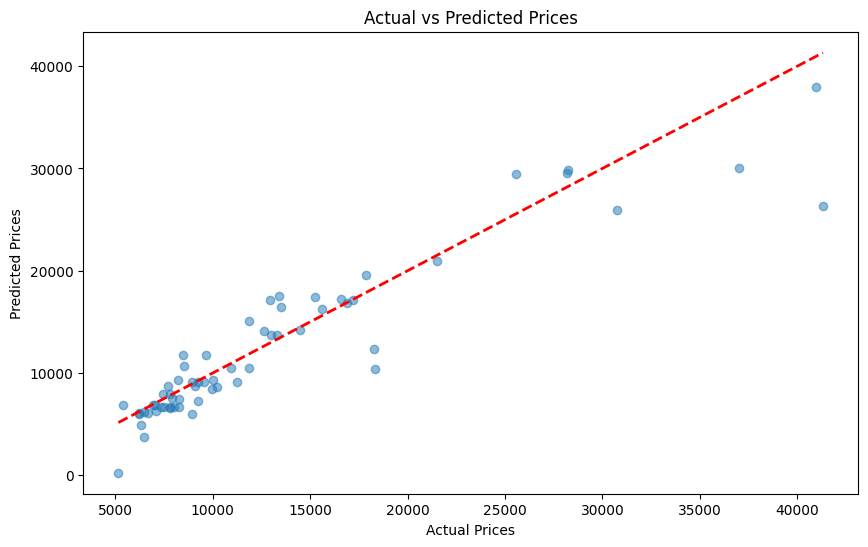

In [ ]:
# Plotting y_test and y_pred to understand the spread
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 9364797.019337729
R2 Score: 0.8648353754909274
